<a href="https://colab.research.google.com/github/jufochoa/ML-Geociencias/blob/main/An%C3%A1lisis_Clasificacion_Multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.PRESENTACION

En el cálculo del transporte de sedimentos a partir de mediciones del campo de flujo se tienen diferentes problemas asociados a: las características del lecho, la disponibilidad del sedimento,además de problemas de escala. Los datos usados corresponden a la base de datos presentada por Brownlie (1981), la cual se compone de 7099 datos 
datos, a partir de 1887 mediciones en ríos naturales y 5212 mediciones en canales de laboratorio. Las variables involucradas en dichas mediciones son:

- Caudal,Q(L/s) - Variable numérica
- Ancho,B (m)   - Variable numérica
- Profundidad de flujo,y (m)  - Variable numérica
- Pendiente del cauce,S(S*1000)  - Variable numérica
- Tamaño medio de los sedimentos del fondo,D50(mm)  - Variable numérica
- Gradación,G (Adim.)  - Variable numérica
- Gravedad específica,Ss(Adim.)  - Variable numérica
- Concentración,C (ppm)  - Variable numérica
- Temperatura, T(C) - Variable numérica
- Forma del Lecho,FL - Variable categórica: 0 - No se observa, 1 - Lecho plano previo a inicio del movimiento, 2 - Rizos, 3 - Dunas, 4 - Lecho en Transición, 5- Lecho plano, 6 Ondas permanenentes, 7- Antidunas,  8 Rápidos y pozos.




Se analiza en este notebook un problema de clasificación con una variable categórica muticlase: **Forma del lecho(FL)**, considerando la base de datos completa con todas las observaciones de ríos y canles de laboratorio.

# 1.ANÁLISIS EXPLORATORIO

In [1]:
#Instalación de bibliotecas
!pip install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Cargue de datos al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargue de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd


In [5]:
! git clone https://github.com/jufochoa/ML-Geociencias.git

fatal: destination path 'ML-Geociencias' already exists and is not an empty directory.


In [9]:
#Carga de datos
from google.colab import drive
dcrudos=pd.read_excel("/content/drive/MyDrive/ML/BDSedimentos.xlsx")

dcrudos.head(6)
dcrudos.tail(6)

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C,Nombre,Tipo
7021,31,0.0300,0.5,0.122,1.66,0.18,3.3,2.65,-1.0,3,150.0,ZNA,Laboratorio
7022,32,0.0300,0.5,0.115,1.80,0.18,3.3,2.65,-1.0,3,500.0,ZNA,Laboratorio
7023,33,0.0298,0.5,0.092,3.50,0.18,3.3,2.65,-1.0,6,1007.0,ZNA,Laboratorio
7024,34,0.0304,0.5,0.086,2.07,0.18,3.3,2.65,-1.0,5,1975.0,ZNA,Laboratorio
7025,35,0.0185,0.5,0.040,8.00,0.18,3.3,2.65,-1.0,7,3240.0,ZNA,Laboratorio
7026,36,0.0092,0.5,0.082,2.79,0.18,3.3,2.65,-1.0,3,272.0,ZNA,Laboratorio


In [ ]:
#Resumen estadístico de los datos
pd.set_option('display.width',100)
pd.set_option('precision',3)
dcrudos.describe()

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C
count,7027.000,7.027e+03,7027.000,7027.000,7027.000,7027.000,7027.00,7027.000,7027.000,7027.000,7027.000
mean,132.922,2.850e+02,38.864,0.791,3.445,1.651,1.54,2.589,13.991,1.669,2065.247
std,168.739,1.700e+03,122.616,1.952,5.135,4.295,2.39,0.287,12.101,2.074,5635.029
min,1.000,3.300e-05,0.070,0.008,-1.000,-10.000,-1.00,1.030,-1.000,0.000,-1.000
25%,25.000,1.505e-02,0.354,0.067,0.820,0.305,1.13,2.650,-1.000,0.000,66.888
50%,70.000,3.877e-02,0.753,0.143,1.500,0.506,1.34,2.650,16.500,0.000,248.000
75%,177.000,6.242e-01,2.438,0.360,4.000,1.349,1.63,2.650,23.000,3.000,1460.500
max,889.000,2.883e+04,1109.472,17.282,162.200,76.113,100.10,4.220,262.000,8.000,111000.000


Se observan valores negativos en las variables **Pendiente(S), D50, Gradación (G), Concentración(C)** y **Temperatura(T)**, que se deben eliminar de la base de datos

In [ ]:
# Conformación de un nuevo conjnto de datos eliminando los valores negativos
dcrudos_F1=dcrudos[(dcrudos["T"]>4)  & (dcrudos["C"]>0) & (dcrudos["G"]>0) & (dcrudos["S"]>0) ]
dcrudos_F1.describe()

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C
count,4601.000,4.601e+03,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000
mean,92.433,4.077e+02,51.750,0.998,2.135,1.546,1.711,2.564,20.428,1.295,1232.276
std,84.529,2.068e+03,144.970,2.279,3.406,4.105,2.901,0.327,8.661,1.840,5348.060
min,1.000,3.300e-05,0.076,0.009,0.003,0.011,0.405,1.030,4.260,0.000,0.003
25%,22.000,1.622e-02,0.381,0.077,0.720,0.286,1.210,2.650,15.800,0.000,65.000
50%,63.000,5.219e-02,0.819,0.160,1.100,0.620,1.440,2.650,20.800,0.000,183.000
75%,147.000,1.184e+01,35.000,0.506,2.000,1.349,1.750,2.650,25.420,3.000,590.828
max,330.000,2.883e+04,1109.472,17.282,36.700,76.113,100.100,2.700,262.000,7.000,111000.000


Eliminando los valores negativos en toda la base de datos, el tamaño pasa de 7027 filas a 4601, es decir, se pierden 2426 (34,5% de los datos). Por lo que se busca cual es la variable que mas datos negativos tiene, encontrando que es la **Temperatura** y mejor se elimina esta variable de la base de datos.

In [ ]:
#Se elimina la columna de temperatura
bdatos=dcrudos.drop(['T'],axis=1)

In [ ]:
#Resumen estadístico de los datos sin la temperatura
bdatos=bdatos[(bdatos["C"]>0) & (bdatos["G"]>0) & (bdatos["S"]>0) ]
bdatos.describe()

,Medición,Q,B,Y,S,D50,G,Ss,FL,C
count,6641.000,6.641e+03,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000
mean,137.721,2.880e+02,37.050,0.740,3.583,1.674,1.598,2.590,1.717,2171.676
std,171.753,1.738e+03,124.111,1.958,5.212,4.253,2.430,0.287,2.098,5776.226
min,1.000,3.300e-05,0.070,0.008,0.003,0.011,0.405,1.030,0.000,0.001
25%,26.000,1.416e-02,0.305,0.065,0.890,0.320,1.150,2.650,0.000,78.300
50%,75.000,3.709e-02,0.736,0.133,1.500,0.536,1.350,2.650,0.000,273.700
75%,185.000,3.834e-01,2.438,0.319,4.299,1.349,1.650,2.650,3.000,1640.000
max,889.000,2.883e+04,1109.472,17.282,162.200,76.113,100.100,4.220,8.000,111000.000


Se pasa entonces a una base de datos con 6641 observaciones, donde se se eliminaron 386 datos(5,5% de los registros originales)

In [ ]:
bdatos

,Medición,Q,B,Y,S,D50,G,Ss,FL,C,Nombre,Tipo
0,1,0.036,0.305,0.131,2.50,0.105,1.27,2.65,0,6600.0,ABA,Laboratorio
1,2,0.036,0.305,0.140,2.20,0.105,1.27,2.65,0,4300.0,ABA,Laboratorio
2,3,0.028,0.305,0.119,2.30,0.105,1.27,2.65,0,7000.0,ABA,Laboratorio
3,4,0.028,0.305,0.131,1.70,0.105,1.27,2.65,0,4500.0,ABA,Laboratorio
4,5,0.025,0.305,0.119,2.10,0.105,1.27,2.65,0,4700.0,ABA,Laboratorio
...,...,...,...,...,...,...,...,...,...,...,...,...
7022,32,0.030,0.500,0.115,1.80,0.180,3.30,2.65,3,500.0,ZNA,Laboratorio
7023,33,0.030,0.500,0.092,3.50,0.180,3.30,2.65,6,1007.0,ZNA,Laboratorio
7024,34,0.030,0.500,0.086,2.07,0.180,3.30,2.65,5,1975.0,ZNA,Laboratorio
7025,35,0.018,0.500,0.040,8.00,0.180,3.30,2.65,7,3240.0,ZNA,Laboratorio


In [ ]:
BDMCXY=bdatos.drop(['Medición','Tipo','Nombre'],axis=1)
BDMCXY

,Q,B,Y,S,D50,G,Ss,FL,C
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,0,6600.0
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,0,4300.0
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,0,7000.0
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,0,4500.0
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,0,4700.0
...,...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,3,500.0
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,6,1007.0
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,5,1975.0
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,7,3240.0


In [ ]:
#Revisión de datos faltantes
BDMCXY.isna().any()

Q      False
B      False
Y      False
S      False
D50    False
G      False
Ss     False
FL     False
C      False
dtype: bool

In [ ]:
#Resumen de datos
BDMCXY.dtypes

Q      float64
B      float64
Y      float64
S      float64
D50    float64
G      float64
Ss     float64
FL       int64
C      float64
dtype: object

In [ ]:
# Distribución de datos para la variable FL
BDMCXY.groupby('FL').size()

FL
0    3514
1      44
2     702
3    1103
4     338
5     630
6      34
7     269
8       7
dtype: int64

Para el análisis de los grupos de datos para el **aprendizaje no supervisado (clasificación multiclase)**,se tiene que Tipo 0:52,9%,Tipo 1:0,7%,Tipo 2:10,6%,Tipo 3:16,6%,Tipo 4:5,1%,Tipo 5:9,5%,Tipo 6:0,5%,Tipo 7:4,1% y Tipo 8:0,1%

In [ ]:
#Valores de X y Y para el problema
BDMCX=BDMCXY.drop(['FL',],axis=1)
BDMCX.describe()

,Q,B,Y,S,D50,G,Ss,C
count,6.641e+03,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000
mean,2.880e+02,37.050,0.740,3.583,1.674,1.598,2.590,2171.676
std,1.738e+03,124.111,1.958,5.212,4.253,2.430,0.287,5776.226
min,3.300e-05,0.070,0.008,0.003,0.011,0.405,1.030,0.001
25%,1.416e-02,0.305,0.065,0.890,0.320,1.150,2.650,78.300
50%,3.709e-02,0.736,0.133,1.500,0.536,1.350,2.650,273.700
75%,3.834e-01,2.438,0.319,4.299,1.349,1.650,2.650,1640.000
max,2.883e+04,1109.472,17.282,162.200,76.113,100.100,4.220,111000.000


In [ ]:
BDMCY=BDMCXY.filter(['FL'])
BDMCY

,FL
0,0
1,0
2,0
3,0
4,0
...,...
7022,3
7023,6
7024,5
7025,7


# 2.APRENDIZAJE NO SUPERVISADO (CLASIFICACION MULTICLASE) - VARIABLE 'FL'

La variable Forma del Lecho(FL) toma valores nominales de 0 a 8 según una forma del lecho observada en el río o canal de laboratorio, según: 0 - No se observa, 1 - Lecho plano previo a inicio del movimiento, 2 - Rizos, 3 - Dunas, 4 - Lecho en Transición, 5- Lecho plano, 6 Ondas permanenentes, 7- Antidunas,  8 Rápidos y pozos.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

###Accuracy

In [ ]:
# Comparación de modelos
#métrica accuracy

models=[]
models.append(('LoR',LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('k-NN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

results=[]
names=[]
scoring='accuracy'
for name,model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDMCX,BDMCY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f}")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

LoR:51.71%(27.37


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

LDA:50.49%(29.35


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

k-NN:47.34%(19.03
CART:53.03%(15.14
NB:34.36%(20.02


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVM:52.97%(24.37


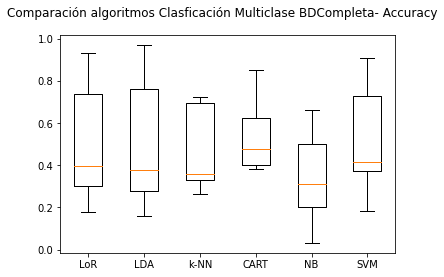

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica

#plt.figure(figsize=(20,20))
fig=plt.figure()
fig.suptitle("Comparación algoritmos Clasficación Multiclase BDCompleta- Accuracy")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos Clasficación Multiclase BDCompleta- Accuracy.jpg")

#3.DETALLE DE MÉTODOS DE CLASIFICACIÓN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

In [ ]:
BDMCX

##3.1 Regresión Logística

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.58      0.96      0.73      1053
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00       197
           3       0.29      0.10      0.15       324
           4       0.00      0.00      0.00       114
           5       0.47      0.23      0.31       203
           6       0.00      0.00      0.00        12
           7       0.45      0.22      0.30        76
           8       0.00      0.00      0.00         2

    accuracy                           0.56      1993
   macro avg       0.20      0.17      0.17      1993
weighted avg       0.42      0.56      0.45      1993



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

In [ ]:
#Métrica Cohen-Kappa
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
cohen_kappa=cohen_kappa_score(Ytest,predicted)
print(f"cohen_kappa:{cohen_kappa*100.0:,.2f}%")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cohen_kappa:15.71%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##3.2 Análisis discriminante Lineal

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=LinearDiscriminantAnalysis()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.55      0.98      0.70      1053
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00       197
           3       0.00      0.00      0.00       324
           4       0.00      0.00      0.00       114
           5       0.55      0.09      0.15       203
           6       0.00      0.00      0.00        12
           7       0.37      0.38      0.38        76
           8       0.20      1.00      0.33         2

    accuracy                           0.54      1993
   macro avg       0.19      0.27      0.17      1993
weighted avg       0.36      0.54      0.40      1993



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

In [ ]:
#Métrica Cohen-Kappa

test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=LinearDiscriminantAnalysis()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
cohen_kappa=cohen_kappa_score(Ytest,predicted)
print(f"cohen_kappa:{cohen_kappa*100.0:,.2f}%")

cohen_kappa:8.50%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##3.3KNN

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=KNeighborsClassifier()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1053
           1       1.00      0.33      0.50        12
           2       0.38      0.38      0.38       197
           3       0.39      0.39      0.39       324
           4       0.33      0.26      0.29       114
           5       0.41      0.26      0.32       203
           6       0.00      0.00      0.00        12
           7       0.45      0.30      0.36        76
           8       0.50      0.50      0.50         2

    accuracy                           0.58      1993
   macro avg       0.46      0.36      0.39      1993
weighted avg       0.56      0.58      0.56      1993



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

In [ ]:
#Métrica Cohen-Kappa

test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=KNeighborsClassifier()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
cohen_kappa=cohen_kappa_score(Ytest,predicted)
print(f"cohen_kappa:{cohen_kappa*100.0:,.2f}%")

cohen_kappa:33.63%


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##3.4 Decision Tree Classifier (CART)

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=DecisionTreeClassifier()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1053
           1       0.89      0.67      0.76        12
           2       0.77      0.82      0.79       197
           3       0.80      0.83      0.82       324
           4       0.52      0.53      0.52       114
           5       0.74      0.72      0.73       203
           6       0.67      0.67      0.67        12
           7       0.72      0.67      0.69        76
           8       1.00      1.00      1.00         2

    accuracy                           0.85      1993
   macro avg       0.78      0.76      0.77      1993
weighted avg       0.85      0.85      0.85      1993



In [ ]:
#Métrica Cohen-Kappa

test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=DecisionTreeClassifier()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
cohen_kappa=cohen_kappa_score(Ytest,predicted)
print(f"cohen_kappa:{cohen_kappa*100.0:,.2f}%")

cohen_kappa:79.02%


##3.5 Naive Bayes

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=GaussianNB()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

In [ ]:
#Métrica Cohen-Kappa

test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=GaussianNB()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
cohen_kappa=cohen_kappa_score(Ytest,predicted)
print(f"cohen_kappa:{cohen_kappa*100.0:,.2f}%")

cohen_kappa:22.51%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##3.6 SupportVectorClassifier (SVC)

In [ ]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=SVC(gamma='auto')
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.63      0.92      0.75      1053
           1       1.00      0.33      0.50        12
           2       0.47      0.27      0.35       197
           3       0.51      0.40      0.45       324
           4       0.45      0.13      0.20       114
           5       0.61      0.14      0.22       203
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        76
           8       0.00      0.00      0.00         2

    accuracy                           0.60      1993
   macro avg       0.41      0.24      0.27      1993
weighted avg       0.55      0.60      0.54      1993



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Métrica Cohen-Kappa

test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDMCX,BDMCY,test_size=test_size,random_state=seed)
model=SVC(gamma='auto')
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
cohen_kappa=cohen_kappa_score(Ytest,predicted)
print(f"cohen_kappa:{cohen_kappa*100.0:,.2f}%")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cohen_kappa:28.90%


# 4.OPTIMIZACIÓN DE HIPERPARÁMETROS

In [ ]:
#Búsqueda del algoritmo de mejor desempeño (de otra forma) mediante el accuraccy

resultados={}
from sklearn.model_selection import cross_validate

def evaluar_modelo(estimador,X,Y):
  resultados_estimador=cross_validate(estimador,X,Y,scoring="accuracy",n_jobs=-1,cv=5,return_train_score=True)
  return resultados_estimador

def ver_resultados():
  resultados_df=pd.DataFrame(resultados).T
  resultados_cols=resultados_df.columns
  for col in resultados_df:
    resultados_df[col]=resultados_df[col].apply(np.mean)
    resultados_df[col+"_idx"]=resultados_df[col]/resultados_df[col].max()
  return resultados_df

In [ ]:
resultados["Reg_Logistica"]=evaluar_modelo(LogisticRegression(),BDMCX,BDMCY)
resultados["Disc_Lineal"]=evaluar_modelo(LinearDiscriminantAnalysis(),BDMCX,BDMCY)
resultados["KNeighbors"]=evaluar_modelo(KNeighborsClassifier(),BDMCX,BDMCY)
resultados["Dec_Tree"]=evaluar_modelo(DecisionTreeClassifier(),BDMCX,BDMCY)
resultados["Naive Bayes"]=evaluar_modelo(GaussianNB(),BDMCX,BDMCY)
resultados["Random Forest"]=evaluar_modelo(RandomForestClassifier(),BDMCX,BDMCY)
resultados["SVC"]=evaluar_modelo(SVC(),BDMCX,BDMCY)
ver_resultados()

,fit_time,score_time,test_score,train_score,fit_time_idx,score_time_idx,test_score_idx,train_score_idx
Reg_Logistica,1.725,0.004,0.535,0.538,0.798,0.007,0.857,0.538
Disc_Lineal,0.015,0.003,0.503,0.541,0.007,0.005,0.806,0.541
KNeighbors,0.013,0.072,0.491,0.718,0.006,0.123,0.786,0.718
Dec_Tree,0.041,0.005,0.460,1.000,0.019,0.008,0.737,1.000
Naive Bayes,0.007,0.004,0.335,0.378,0.003,0.007,0.536,0.378
Random Forest,1.011,0.045,0.624,1.000,0.467,0.078,1.000,1.000
SVC,2.163,0.583,0.546,0.550,1.000,1.000,0.875,0.550


Se observa que el método de **Random Forest** tiene el mejor desempeño. Posteriormente el mètodo de **Random Forest** es el método con mejor desempeño y será el que se evalúe en la optimización de parámetros

##4.1 Random Forest

### GridSearchCV

In [ ]:
# Cargue de bibliotecas para la bùsqueda de hiperparámetros óptimos
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Selección del estimador
estimador_RF=RandomForestClassifier()

In [ ]:
#Visualización de parámetros del modelo seleccionado
#Con Random Forest
estimador_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parametros_busqueda_RF={"criterion":["gini","entropy"],"n_estimators":np.linspace(10,1000,10).astype(int),"class_weight":[None,"balanced"]}

In [ ]:
grid=GridSearchCV(estimator=estimador_RF,param_grid=parametros_busqueda_RF,scoring="accuracy",n_jobs=-1)

In [ ]:
grid.fit(BDMCX,BDMCY)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000])},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.6381611094490831
RandomForestClassifier(n_estimators=120)


Los mejores hiperparámetros obtenidos corresponden a un  accuracy=0.638(std=0,056), class_weight='None', criterion='gini' y n_estimators=120

In [ ]:
#Orden de resultados
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.779,0.287,0.074,3.449e-02,None,gini,120,"{'class_weight': None, 'criterion': 'gini', 'n...",0.610,0.651,0.562,0.733,0.633,0.638,0.056,1
15,11.650,0.728,0.243,6.912e-03,None,entropy,560,"{'class_weight': None, 'criterion': 'entropy',...",0.631,0.658,0.520,0.724,0.652,0.637,0.066,2
19,19.747,0.558,0.436,1.346e-02,None,entropy,1000,"{'class_weight': None, 'criterion': 'entropy',...",0.627,0.659,0.521,0.727,0.651,0.637,0.067,3
11,2.381,0.047,0.056,2.149e-03,None,entropy,120,"{'class_weight': None, 'criterion': 'entropy',...",0.632,0.648,0.518,0.725,0.651,0.635,0.067,4
18,17.532,0.393,0.388,8.074e-03,None,entropy,890,"{'class_weight': None, 'criterion': 'entropy',...",0.622,0.665,0.520,0.726,0.642,0.635,0.067,5
10,0.254,0.089,0.009,1.181e-03,None,entropy,10,"{'class_weight': None, 'criterion': 'entropy',...",0.594,0.677,0.570,0.689,0.642,0.635,0.046,6
16,14.104,1.144,0.298,1.961e-02,None,entropy,670,"{'class_weight': None, 'criterion': 'entropy',...",0.628,0.660,0.522,0.724,0.639,0.635,0.066,7
14,9.101,0.363,0.200,1.285e-02,None,entropy,450,"{'class_weight': None, 'criterion': 'entropy',...",0.628,0.666,0.519,0.714,0.642,0.634,0.064,8
5,8.114,0.929,0.339,6.765e-02,None,gini,560,"{'class_weight': None, 'criterion': 'gini', 'n...",0.624,0.652,0.522,0.724,0.643,0.633,0.065,9
17,15.611,0.525,0.337,1.605e-02,None,entropy,780,"{'class_weight': None, 'criterion': 'entropy',...",0.628,0.656,0.520,0.720,0.638,0.632,0.065,10


In [ ]:
resultados["RF_gridsearch"]=evaluar_modelo(grid.best_estimator_,BDMCX,BDMCY)

In [ ]:
resultados["RF_gridsearch"]=evaluar_modelo(grid.best_estimator_,BDMCX,BDMCY)

###Randomized Search

In [ ]:
busqueda_random=RandomizedSearchCV(estimator=estimador_RF,
                                   param_distributions=parametros_busqueda_RF,
                                   scoring="accuracy",n_jobs=-1,n_iter=15)

In [ ]:
resultados["RF_gridsearch"]=evaluar_modelo(grid.best_estimator_,BDMCX,BDMCY)

In [ ]:
busqueda_random.fit(BDMCX,BDMCY)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'n_estimators': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000])},
                   scoring='accuracy')

In [ ]:
print(busqueda_random.best_score_)
print(busqueda_random.best_estimator_)
print(grid.best_params_)

0.6327386294614122
RandomForestClassifier(n_estimators=560)


##4.2 Decision Tree Classifier

### GridSearchCV

In [ ]:
#Selección del estimador 
estimador_DT=DecisionTreeClassifier()

In [ ]:
#Visualización de parámetros del modelo Random Forest
estimador_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
parametros_busqueda_DT={"criterion":['gini', 'entropy'],"max_depth":[2,4,6,8,10,12],'min_samples_leaf': [5, 10, 20, 50, 100]}

In [ ]:
grid=GridSearchCV(estimator=estimador_DT,param_grid=parametros_busqueda_DT,scoring="accuracy",n_jobs=-1)

In [ ]:
grid.fit(BDMCX,BDMCY)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.5426877940656532
DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=100)


In [ ]:
#Orden de resultados
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,0.026,1.744e-03,0.003,1.593e-04,entropy,2,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.553,0.581,0.523,0.529,0.526,0.543,0.022,1
9,0.021,1.243e-03,0.003,1.483e-04,gini,4,100,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.471,0.603,0.582,0.675,0.374,0.541,0.106,2
0,0.015,1.222e-03,0.003,4.556e-04,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.473,0.581,0.529,0.623,0.499,0.541,0.055,3
1,0.016,5.277e-03,0.003,5.496e-04,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.473,0.581,0.529,0.623,0.499,0.541,0.055,3
2,0.014,5.942e-04,0.003,2.587e-05,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.473,0.581,0.529,0.623,0.499,0.541,0.055,3
3,0.013,4.037e-04,0.003,2.260e-04,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.473,0.581,0.529,0.623,0.499,0.541,0.055,3
4,0.014,1.666e-03,0.003,1.373e-04,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.473,0.581,0.529,0.623,0.499,0.541,0.055,3
33,0.026,7.804e-04,0.003,5.779e-05,entropy,2,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.540,0.581,0.523,0.529,0.526,0.540,0.021,8
32,0.027,1.970e-03,0.003,6.646e-04,entropy,2,20,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.540,0.581,0.523,0.529,0.526,0.540,0.021,8
31,0.027,3.121e-04,0.005,3.430e-03,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.540,0.581,0.523,0.529,0.526,0.540,0.021,8


##4.3 KNN

###GridSearchCV

In [ ]:
#Selección del estimador 
estimador_KNN=KNeighborsClassifier()

In [ ]:
#Visualización de parámetros del modelo KNN
estimador_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
parametros_busqueda_KNN={"n_neighbors":list(range(1,20)),"p":[1,2,3],"leaf_size":list(range(1,25)),'weights':['uniform','distance'],
               'metric':['minkowski','euclidean','manhattan']}

In [ ]:
grid=GridSearchCV(estimator=estimador_KNN,param_grid=parametros_busqueda_KNN,scoring="accuracy",n_jobs=-1)

In [ ]:
grid.fit(BDMCX,BDMCY)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.5104563853608565
KNeighborsClassifier(leaf_size=1, n_neighbors=19, weights='distance')
{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}


In [ ]:
#Orden de resultados
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1249,0.016,4.775e-04,0.032,0.003,4,euclidean,19,1,distance,"{'leaf_size': 4, 'metric': 'euclidean', 'n_nei...",0.570,0.525,0.535,0.529,0.394,0.510,0.060,1
1137,0.018,6.222e-03,0.034,0.003,4,minkowski,19,2,distance,"{'leaf_size': 4, 'metric': 'minkowski', 'n_nei...",0.570,0.525,0.535,0.529,0.394,0.510,0.060,1
3873,0.012,3.242e-04,0.027,0.006,12,minkowski,19,2,distance,"{'leaf_size': 12, 'metric': 'minkowski', 'n_ne...",0.570,0.525,0.535,0.529,0.394,0.510,0.060,1
5925,0.013,4.213e-04,0.025,0.002,18,minkowski,19,2,distance,"{'leaf_size': 18, 'metric': 'minkowski', 'n_ne...",0.570,0.525,0.535,0.529,0.394,0.510,0.060,1
3647,0.013,5.915e-04,0.025,0.001,11,euclidean,19,3,distance,"{'leaf_size': 11, 'metric': 'euclidean', 'n_ne...",0.570,0.525,0.535,0.529,0.394,0.510,0.060,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,0.014,1.472e-03,0.018,0.001,19,manhattan,2,1,distance,"{'leaf_size': 19, 'metric': 'manhattan', 'n_ne...",0.543,0.440,0.512,0.505,0.383,0.477,0.058,7921
6393,0.015,3.246e-03,0.017,0.001,19,manhattan,2,2,distance,"{'leaf_size': 19, 'metric': 'manhattan', 'n_ne...",0.543,0.440,0.512,0.505,0.383,0.477,0.058,7921
6395,0.013,1.458e-03,0.016,0.001,19,manhattan,2,3,distance,"{'leaf_size': 19, 'metric': 'manhattan', 'n_ne...",0.543,0.440,0.512,0.505,0.383,0.477,0.058,7921
6386,0.013,4.262e-04,0.067,0.004,19,manhattan,1,2,uniform,"{'leaf_size': 19, 'metric': 'manhattan', 'n_ne...",0.543,0.440,0.512,0.505,0.383,0.477,0.058,7921


##4.2 SVC

In [ ]:
#Selección del estimador 
estimador_SVC=SVC()

In [ ]:
#Visualización de parámetros del modelo Random Forest
estimador_SVC.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
parametros_busqueda_SVC={"kernel":["rbf","poly"],"gamma":[1,0.1,0.01],"C":[0.1,1,10]}

In [ ]:
grid=GridSearchCV(estimator=estimador_SVC,param_grid=parametros_busqueda_SVC,scoring="accuracy",n_jobs=-1)

In [ ]:
grid.fit(BDMCX,BDMCY)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

AttributeError: ignored

In [ ]:
#Orden de resultados
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

### Accuracy

4

In [ ]:
# Usando método de regresión logística

kfold=KFold(n_splits=10)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
scoring_ANSB_RL='accuracy'

Acc_ANSB_RL=cross_val_score(model,ANSB_X,ANSB_Y,cv=kfold,scoring=scoring_ANSB_RL)
print(Acc_ANSB_RL)
print(f"AUC:{Acc_ANSB_RL.mean()*100.0:,.2f}% ({Acc_ANSB_RL.std()*100.0:,.2f}%)")

[0.997 0.881 0.88  0.905 0.983 0.875 0.989 0.962 0.95  0.982]
AUC:94.05% (4.75%)


In [ ]:
# Usando método de random forest

kfold = KFold(n_splits=10)
model = RandomForestClassifier()

Acc_ANSB_RF= cross_val_score(model, ANSB_X,ANSB_Y, cv=kfold, scoring='accuracy')
print(Acc_ANSB_RF)
print(f"Accuracy:{Acc_ANSB_RF.mean()*100.0:,.2f}% ({Acc_ANSB_RF.std()*100.0:,.2f}%)")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy:100.00% (0.00%)


### Logarithmic Loss

In [ ]:
LL_ANSB = cross_val_score(model,ANSB_X,ANSB_Y, cv=kfold, scoring='neg_log_loss')
print(LL_ANSB)
print(f"Accuracy:{LL_ANSB.mean()*100.0:,.2f}% ({LL_ANSB.std()*100.0:,.2f}%)")

[-0.044 -0.339 -0.227 -0.177 -0.137 -0.688 -0.065 -0.167 -0.112 -0.081]
Accuracy:-20.38% (18.12%)


## Matriz de confusión

In [ ]:
# Con Regresión logística

from sklearn.metrics import confusion_matrix

test_size=0.3
seed=7
Xtrain,Xtest,Ytrain,Ytest=train_test_split(ANSB_X,ANSB_Y,test_size=test_size,random_state=seed)

model=LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(Xtrain,Ytrain)
YTrain_pred=model.predict(Xtest)
mat_con_ANSB=confusion_matrix(Ytest,YTrain_pred)
print(mat_con_ANSB)
#[VP FN;FP VN ]

[[1004   38]
 [  73  878]]


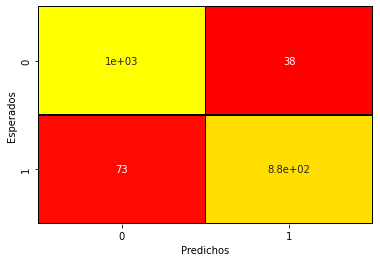

In [ ]:
import seaborn as sns
sns.heatmap(mat_con_ANSB, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.autumn)
plt.xlabel('Predichos')
plt.ylabel('Esperados')
plt.show()

## Curva ROC

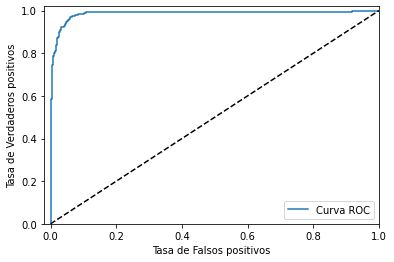

In [ ]:
from sklearn.metrics import roc_curve

probs=model.predict_proba(Xtest)
Ypred_proba = probs[:,1]

fpr,tpr,threshold=roc_curve(Ytest,Ypred_proba)
plt.plot(fpr,tpr, label='Curva ROC')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.legend(loc=4);

In [ ]:
# Método de regresion logística

kfold=KFold(n_splits=10)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
scoring_ANSB='roc_auc'
result_vc_roc=cross_val_score(model,ANSB_X,ANSB_Y,cv=kfold,scoring=scoring_ANSB)

print(result_vc_roc)
print(f"AUC:{result_vc_roc.mean()*100.0:,.2f}% ({result_vc_roc.std()*100.0:,.2f}%)")

[0.999 0.933 0.99  0.982 0.99  0.966 0.999 0.992 0.992 0.958]
AUC:98.02% (2.04%)


In [ ]:
# Usando método de random forest
kfold = KFold(n_splits=10)
model = RandomForestClassifier()

Acc_ANSB_RF= cross_val_score(model, ANSB_X,ANSB_Y, cv=kfold, scoring='accuracy')
print(Acc_ANSB_RF)
print(f"Accuracy:{Acc_ANSB_RF.mean()*100.0:,.2f}% ({Acc_ANSB_RF.std()*100.0:,.2f}%)")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy:100.00% (0.00%)


## Reporte de clasificación

In [ ]:
# Viene de clasificación logística

test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(ANSB_X,ANSB_Y,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_ANSB=classification_report(Ytest,predicted)
print(RC_ANSB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1033
           1       0.97      0.92      0.94       960

    accuracy                           0.95      1993
   macro avg       0.95      0.95      0.95      1993
weighted avg       0.95      0.95      0.95      1993



## Bias-Variance_TradeOff

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Con regresión lineal

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)

train_score=lr.score(Xtrain,Ytrain)
test_score=lr.score(Xtest,Ytest)
print('Train score:', train_score)
print('Test score:', test_score)


Train score: 0.28594956171592534
Test score: 0.24580989559130673


In [ ]:
# Con KNeighbors
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

train_score=kn.score(Xtrain,Ytrain)
test_score=kn.score(Xtest,Ytest)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.6069304371391049
Test score: 0.6152590351726364


In [ ]:
# Con regresión logística

from sklearn.linear_model import LogisticRegression

lgr=LogisticRegression(solver='lbfgs',max_iter=1000)
lgr.fit(Xtrain,Ytrain)

train_score=lgr.score(Xtrain,Ytrain)
test_score=lgr.score(Xtest,Ytest)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.9485800344234079
Test score: 0.9478173607626693


In [ ]:
# Con Random Forest

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(Xtrain,Ytrain)

train_score=rf.score(Xtrain,Ytrain)
test_score=rf.score(Xtest,Ytest)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 1.0
Test score: 1.0


Tanto con el modelo lineal se obtiene un ajuste muy pobre, que mejora con el modelo KNeighbors, indicando que ambos ajustes tienen problema de sesgo. Con el modelo de regresión logística se obtiene un buen ajuste y con el de random forest se obtiene el mejor modelo.

## Curva de ajuste

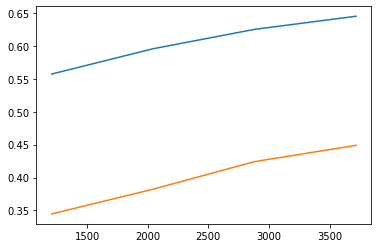

In [ ]:
# Para KNeighbors
from sklearn.model_selection import learning_curve

lc_KN = learning_curve(KNeighborsRegressor(n_neighbors=5),Xtrain,Ytrain,cv=5)
samples_KN, train, test = lc_KN[0], lc_KN[1], lc_KN[2]

plt.plot(samples_KN[1:],np.mean(train,axis=1)[1:])
plt.plot(samples_KN[1:],np.mean(test,axis=1)[1:]);

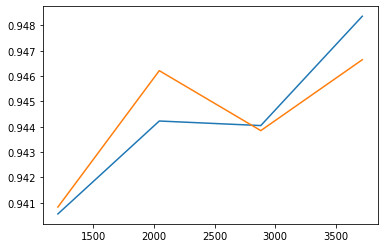

In [ ]:
# Para regresión logística

lc_RL = learning_curve(LogisticRegression(solver='lbfgs',max_iter=1000),Xtrain,Ytrain,cv=5)
samples_RL, train, test = lc_RL[0], lc_RL[1], lc_RL[2]

plt.plot(samples_RL[1:],np.mean(train,axis=1)[1:])
plt.plot(samples_RL[1:],np.mean(test,axis=1)[1:]);

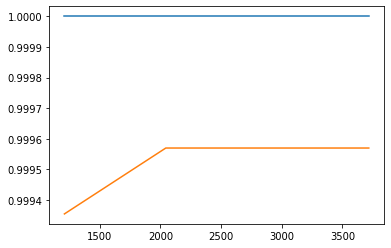

In [ ]:
# Para Random Forest

lc_RF = learning_curve(RandomForestClassifier(),Xtrain,Ytrain,cv=5)
samples_RF, train, test = lc_RF[0], lc_RF[1], lc_RF[2]

plt.plot(samples_RF[1:],np.mean(train,axis=1)[1:])
plt.plot(samples_RF[1:],np.mean(test,axis=1)[1:]);

# 3.3 Modelación de datos

## Análisis de componentes principales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#Conjuntos de datos:ANSB_X_est, ANSB_X_norm,ANSB_X_resc. Se varían para analizar

In [ ]:
#Analisis de componentes principales
n = len(ANSB_X_resc[1])  # número de features
acp_ANSB_X_resc = PCA(n_components=n).fit(ANSB_X_resc)

print(acp_ANSB_X_resc.components_)

[[ 0.322  0.653  0.665 -0.04  -0.019  0.016  0.05  -0.035  0.013  0.148]
 [-0.03  -0.029 -0.022  0.067  0.001 -0.011  0.994  0.066  0.004 -0.011]
 [-0.023 -0.075  0.089 -0.013  0.902  0.021  0.027 -0.412 -0.023 -0.012]
 [ 0.087  0.016  0.018  0.377  0.39  -0.004 -0.077  0.831  0.03   0.03 ]
 [-0.025 -0.641  0.513 -0.043 -0.08   0.078 -0.002  0.037  0.109  0.546]
 [ 0.444  0.137 -0.499  0.172  0.019 -0.12   0.011 -0.152  0.077  0.679]
 [ 0.762 -0.367  0.096  0.206 -0.076 -0.104  0.003 -0.112 -0.132 -0.432]
 [-0.326  0.04   0.159  0.808 -0.129 -0.336 -0.044 -0.28  -0.064  0.007]
 [ 0.024  0.035 -0.053  0.348 -0.065  0.924 -0.004 -0.125 -0.005 -0.012]
 [ 0.042  0.004 -0.002  0.062 -0.001 -0.03  -0.005 -0.061  0.979 -0.175]]


In [ ]:
print(f"Varianza explicada:{acp_ANSB_X_resc.explained_variance_}")
print(f"Relación de Varianza explicada:{acp_ANSB_X_resc.explained_variance_ratio_}")

Varianza explicada:[0.027 0.008 0.003 0.003 0.002 0.001 0.001 0.001 0.001 0.   ]
Relación de Varianza explicada:[0.587 0.173 0.07  0.062 0.037 0.023 0.018 0.013 0.012 0.005]


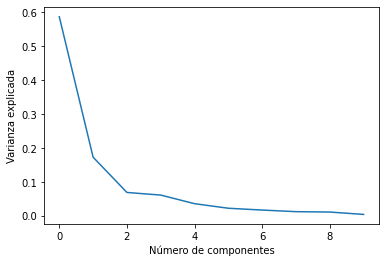

In [ ]:
#Gráfico de varianza explicada
plt.plot(acp_ANSB_X_resc.explained_variance_ratio_)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

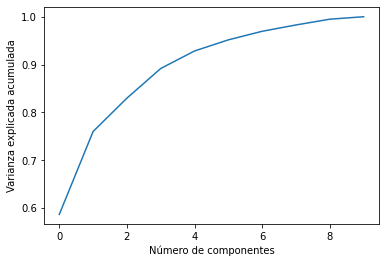

In [ ]:
#Gráfico de varianza acumulada
plt.plot(np.cumsum(acp_ANSB_X_resc.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

In [ ]:
acp_samples = acp_ANSB_X_resc.transform(ANSB_X_resc) # Transformación en el nuevo espacio dimensional

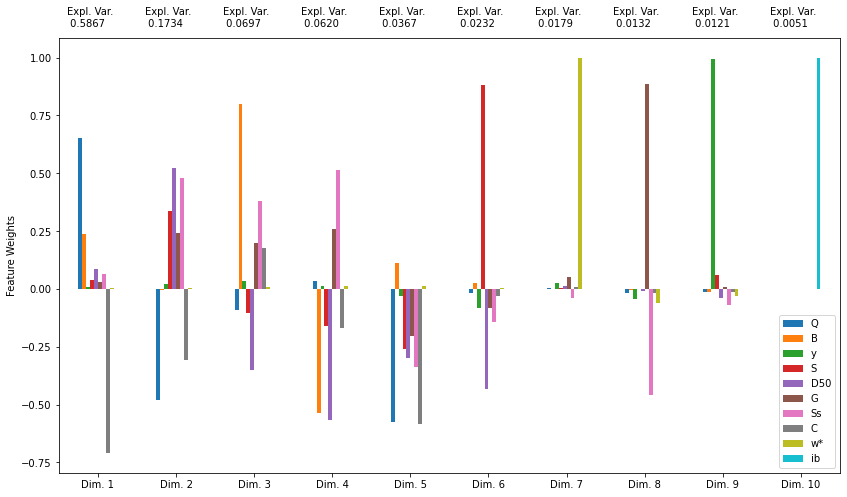

In [ ]:
# Gráfico de aporte de variable a cada componente

def acp_ANSB_X_resc_results(ANSB_X_resc,acp_ANSB_X_resc):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(acp_ANSB_X_est .components_)+1)]
    
    components = pd.DataFrame(np.round(acp_ANSB_X_est .components_, 4), columns = ANSB_X.keys()) 
    components.index = dimensions

    ratios = acp_ANSB_X_resc.explained_variance_ratio_.reshape(len(acp_ANSB_X_resc.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(acp_ANSB_X_resc.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

acp_ANSB_X_resc_results = acp_ANSB_X_resc_results(ANSB_X_est, acp_ANSB_X_resc)